<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/Assignment3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignement 3


## #4 [20 marks]

a) **[5 marks]** On average, the observations that are within 0.1 of X consists of 10% of the available observations.

b) **[5 marks]** On average, the observations that are within 0.1 of $X_1$ and 0.1 of $X_2$ consists of 1% of the available observations.

c) **[5 marks]** On average, $ 0.1^{100\%} * 100 = 10^{-98}\%.$

d) **[5 marks]** Given the pattern above, we can observe that the percentage of observations within 0.1 of each predictor decreases exponentially by $0.1^p$

e)
When $p = 1$, the line segment which contains 0.1 of the data has length 0.1.

When $p = 2$, the square which contains 0.1 of the data has area 0.1, so the length of a side is $\sqrt{0.10} \sim 0.32$

When $p = 3$, the cube which contains 0.1 of the data has volume 0.1, so the length of a side is $\sqrt[3]{0.10} \sim 0.46$

In general, the length of a side of the hypercube which contains 0.1 of the data is therefore $0.1^{1/p}$, which approaches 1 as $p$ gets large.

## 6 [20 marks]

a) 
If $X = [40 \text{hours}, 3.5 \text{GPA}]$

$$
\hat{p}(X) = \frac {e^{-6 + 0.05 X_1 + X_2}} {1 + e^{(-6 + 0.05 X_1 + X_2}}
\\
     = \frac {e^{-6 + 0.05 (40) + 3.5)}} {1 + e^{-6 + 0.05(40) + 3.5}}
\\
     = \frac {e^{-0.5}} {1 + e^{-0.5}}
\\
     = .3775
$$

b) 
If $X = [X_1 \text{hours}, 3.5 \text{GPA}]$


$$
\hat{p}(X) = \frac {e^{-6 + 0.05 X_1 + X_2}} {1 + e^{(-6 + 0.05 X_1 + X_2}}
\\
0.50 = \frac {e^{-6 + 0.05 X_1 + 3.5}} {1 + e^{-6 + 0.05 X_1 + 3.5)}}
\\
0.50 (1 + e^{-2.5 + 0.05 X_1}) = e^{-2.5 + 0.05 X_1}
\\
0.50 + 0.50 e^{-2.5 + 0.05 X_1} = e^{-2.5 + 0.05 X_1}
\\
0.50 = 0.50 e^{-2.5 + 0.05 X_1}
\\
\log(0.50) = \log(0.50) +  \log\left(e^{-2.5 + 0.05 X_1}\right)
\\
0 = -2.5 + 0.05 X_1
\\
X_1 = 50
$$

# 11 [40 marks]

a) **[5 marks]**

In [ ]:
library(ISLR)
attach(Auto)

mpg01 = rep(0, length(mpg))
mpg01[mpg > median(mpg)] = 1
Auto = data.frame(Auto, mpg01)

b)  **[5 marks]**
The variable mpg appears to be correlated with cylinders, displacement, horsepower, weight, and acceleration.

However it is diffult to assess the relationship between mpg01 and the other variables (like year, and cylinders) with a scatterplot, because the points overlap on top of each other. So instead, use a boxplot.

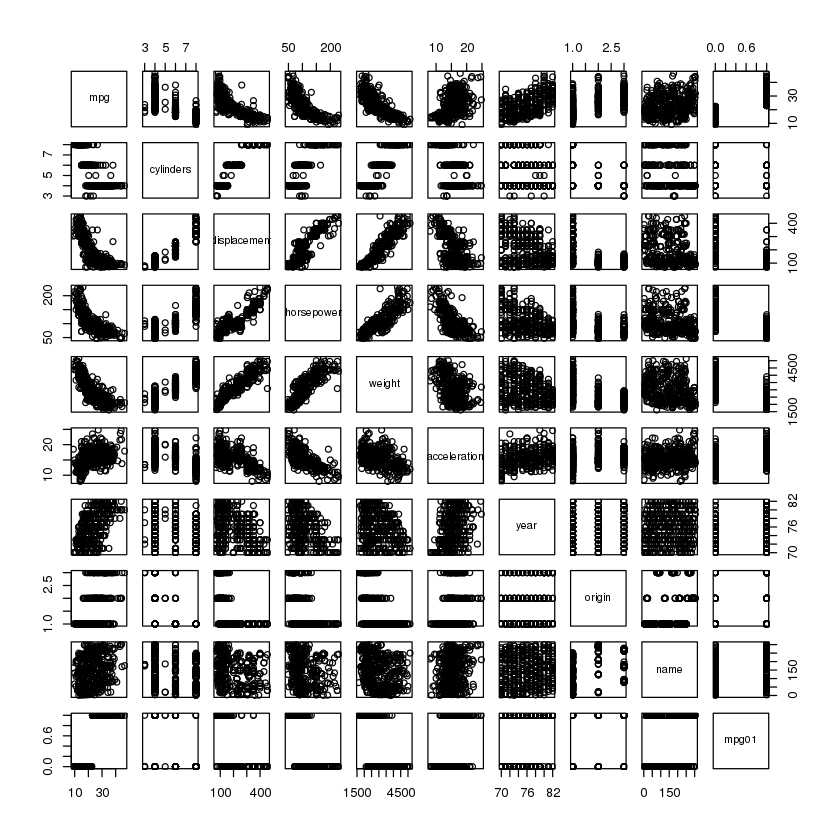

In [ ]:
pairs(Auto) 

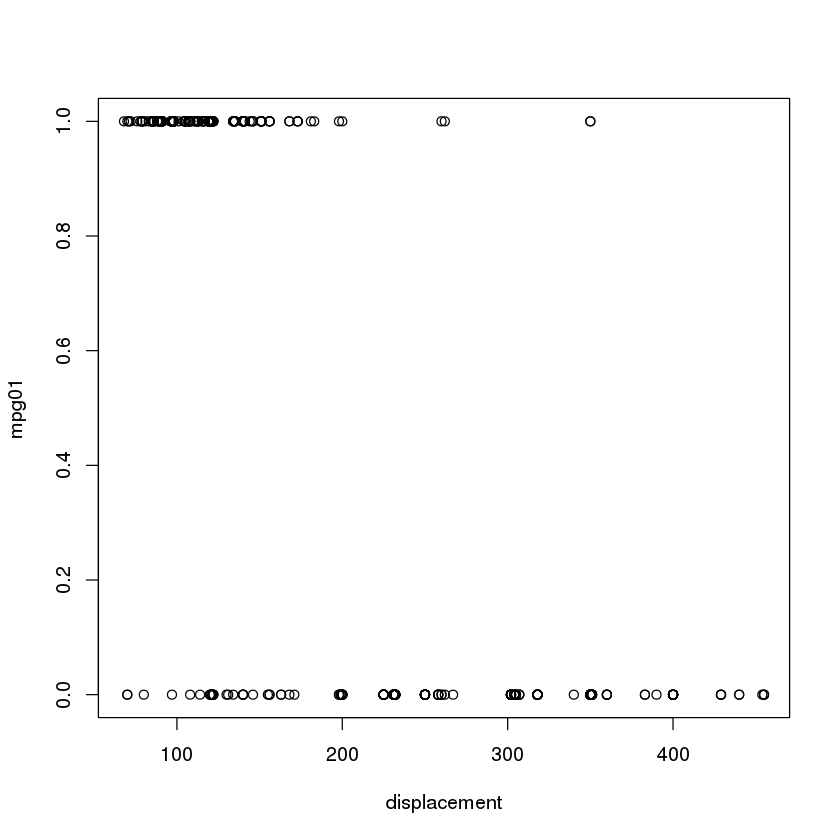

In [ ]:
plot(displacement,mpg01)

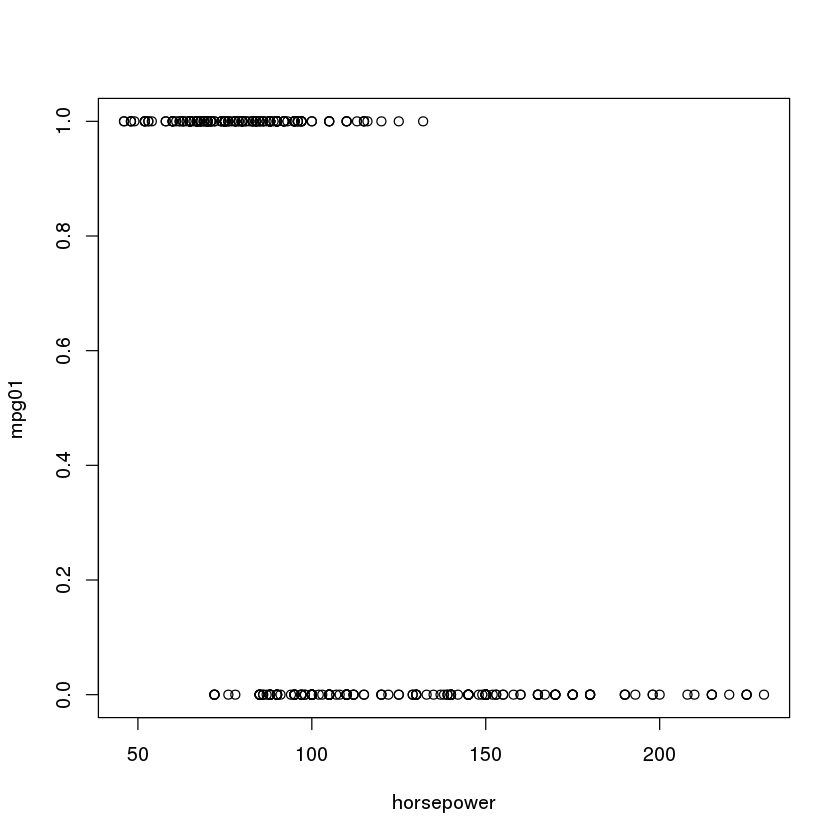

In [ ]:
plot(horsepower,mpg01)

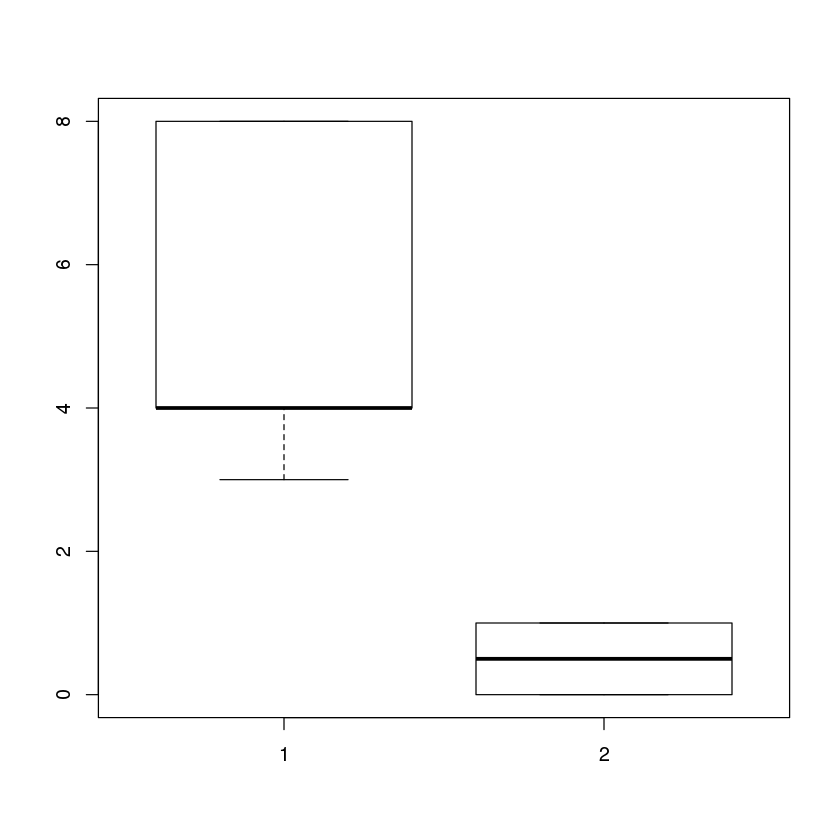

In [ ]:
boxplot(cylinders,mpg01)

c)  **[5 marks]** Split the sample **randomly**

In [ ]:
set.seed(3)
train <- sample(392,196) 
Auto.train = Auto[train, ]
Auto.test = Auto[-train, ] #this -train indexing selects the observations not in the training set
mpg01.test = mpg01[-train]

d)  **[5 marks]** The test error rate is 12.2%. Note that this may differ depending on the predictors you put in the model.

In [ ]:
# LDA
library(MASS)
lda.fit = lda(mpg01 ~ cylinders + weight + displacement + horsepower + acceleration, data = Auto, 
    subset = train)
lda.pred = predict(lda.fit, Auto.test)
mean(lda.pred$class != mpg01.test)

[1] 0.122449

e)  **[5 marks]** The test error rate is 13.2%. Note that this may differ depending on the predictors you put in the model. 

In [ ]:
qda.fit = qda(mpg01 ~ cylinders + weight + displacement + horsepower + acceleration, data = Auto, 
    subset = train)
qda.pred = predict(qda.fit, Auto.test)
mean(qda.pred$class != mpg01.test)

[1] 0.1326531

f) **[5 marks]** The test error rate is 14.8%

In [ ]:
glm.fit = glm(mpg01 ~ cylinders + weight + displacement + horsepower + acceleration, data = Auto, 
    family = binomial, subset = train)
glm.probs = predict(glm.fit, Auto.test, type = "response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs > 0.5] = 1
mean(glm.pred != mpg01.test)

[1] 0.1479592

g) [**10 marks **] Values of $k$ around 5 seem to perform the best. Note that this might depend on the predictors you use.

In [ ]:
library(class)
train.X = cbind(cylinders, weight, displacement, horsepower,acceleration)[train, ]
test.X = cbind(cylinders, weight, displacement, horsepower,acceleration)[-train, ]
train.mpg01 = mpg01[train]

# KNN(k=1)
knn.pred1 <- knn(train.X, test.X, train.mpg01, k = 1)
mean(knn.pred1 != mpg01.test)

[1] 0.1377551

In [ ]:
# KNN(k=5)
knn.pred2 <- knn(train.X, test.X, train.mpg01, k = 5)
mean(knn.pred2 != mpg01.test)

[1] 0.127551

In [ ]:
# KNN(k=10)
knn.pred3 <- knn(train.X, test.X, train.mpg01, k = 10)
mean(knn.pred3 != mpg01.test)

[1] 0.1428571

In [ ]:
# KNN(k=20)
knn.pred4 <- knn(train.X, test.X, train.mpg01, k = 20)
mean(knn.pred4 != mpg01.test)

[1] 0.1428571

In [ ]:
# KNN(k=30)
knn.pred5 <- knn(train.X, test.X, train.mpg01, k = 30)
mean(knn.pred5 != mpg01.test)

[1] 0.1530612

In [ ]:
# KNN(k=10)
knn.pred6 <- knn(train.X, test.X, train.mpg01, k = 100)
mean(knn.pred6 != mpg01.test)

[1] 0.1581633